In [71]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [72]:
data = pd.read_csv('Stats survey.csv')

In [73]:
data .head()

,Timestamp,Your Sex?,Your Matric (grade 12) Average/ GPA (in %),What year were you in last year (2023) ?,What faculty does your degree fall under?,Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student),Your Accommodation Status Last Year (2023),Monthly Allowance in 2023,Were you on scholarship/bursary in 2023?,Additional amount of studying (in hrs) per week,How often do you go out partying/socialising during the week?,"On a night out, how many alcoholic drinks do you consume?","How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)",How many modules have you failed thus far into your studies?,Are you currently in a romantic relationship?,Do your parents approve alcohol consumption?,How strong is your relationship with your parent/s?
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [74]:
data.columns = ['timestamp','sex','matric_gpa_%' ,'year_in_2023','faculty',
                'gpa_%_2023','accommodation_status',    'monthly_allowance','scholarship_bursary_2023',
                'study_hours_week','socialising_week','drinks_night',    'classes_missed_alcohol','modules_failed',
                'in_relationship','parental_approval_alcohol','relationship_with_parents']

### Data Exploration

In [75]:
data.head(1)

,timestamp,sex,matric_gpa_%,year_in_2023,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship_bursary_2023,study_hours_week,socialising_week,drinks_night,classes_missed_alcohol,modules_failed,in_relationship,parental_approval_alcohol,relationship_with_parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close


In [76]:
data.scholarship_bursary_2023.value_counts()

scholarship_bursary_2023
No                     352
Yes (NSFAS, etc...)     46
Name: count, dtype: int64

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   timestamp                  406 non-null    object 
 1   sex                        404 non-null    object 
 2   matric_gpa_%               399 non-null    float64
 3   year_in_2023               333 non-null    object 
 4   faculty                    399 non-null    object 
 5   gpa_%_2023                 320 non-null    float64
 6   accommodation_status       383 non-null    object 
 7   monthly_allowance          375 non-null    object 
 8   scholarship_bursary_2023   398 non-null    object 
 9   study_hours_week           403 non-null    object 
 10  socialising_week           404 non-null    object 
 11  drinks_night               404 non-null    object 
 12  classes_missed_alcohol     403 non-null    object 
 13  modules_failed             403 non-null    object 

In [78]:
data.shape

(406, 17)

In [79]:
data.columns

Index(['timestamp', 'sex', 'matric_gpa_%', 'year_in_2023', 'faculty',
       'gpa_%_2023', 'accommodation_status', 'monthly_allowance',
       'scholarship_bursary_2023', 'study_hours_week', 'socialising_week',
       'drinks_night', 'classes_missed_alcohol', 'modules_failed',
       'in_relationship', 'parental_approval_alcohol',
       'relationship_with_parents'],
      dtype='object')

In [80]:
data.sample(frac=0.02, random_state=33)

,timestamp,sex,matric_gpa_%,year_in_2023,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship_bursary_2023,study_hours_week,socialising_week,drinks_night,classes_missed_alcohol,modules_failed,in_relationship,parental_approval_alcohol,relationship_with_parents
390,2024/03/11 3:55:29 pm EET,Male,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,R 4001- R 5000,No,1-3,0,0,0,0,No,Yes,Very close
329,2024/03/08 4:35:19 pm EET,Male,76.0,2nd Year,Science,58.0,Non-private accommodation ie. Res,R 4001- R 5000,No,3-5,1,5-8,2,0,No,Yes,Very close
349,2024/03/10 12:58:47 pm EET,Male,83.0,2nd Year,Economic & Management Sciences,63.0,Non-private accommodation ie. Res,R 4001- R 5000,No,1-3,4+,3-5,1,0,No,No,Very close
357,2024/03/11 2:06:31 pm EET,Male,85.0,Postgraduate,AgriSciences,78.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,8+,3,8+,0,0,Yes,Yes,Very close
119,2024/03/07 6:07:35 pm EET,Female,76.0,Postgraduate,Economic & Management Sciences,79.0,Private accommodation/ stay with family/friends,R 8000+,No,5-8,2,1-3,0,0,No,Yes,Very close
166,2024/03/07 7:33:31 pm EET,Female,74.0,NaN,Science,NaN,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,8+,2,1-3,0,0,No,Yes,Very close
207,2024/03/07 8:57:39 pm EET,Female,75.0,1st Year,Economic & Management Sciences,60.0,Private accommodation/ stay with family/friends,R 8000+,No,0,3,8+,1,0,Yes,Yes,Very close
114,2024/03/07 6:05:33 pm EET,Female,83.0,1st Year,Economic & Management Sciences,NaN,NaN,R 6001 - R 7000,No,1-3,Only weekends,5-8,0,0,Yes,Yes,Fair


**Let's see how our data are distributed**

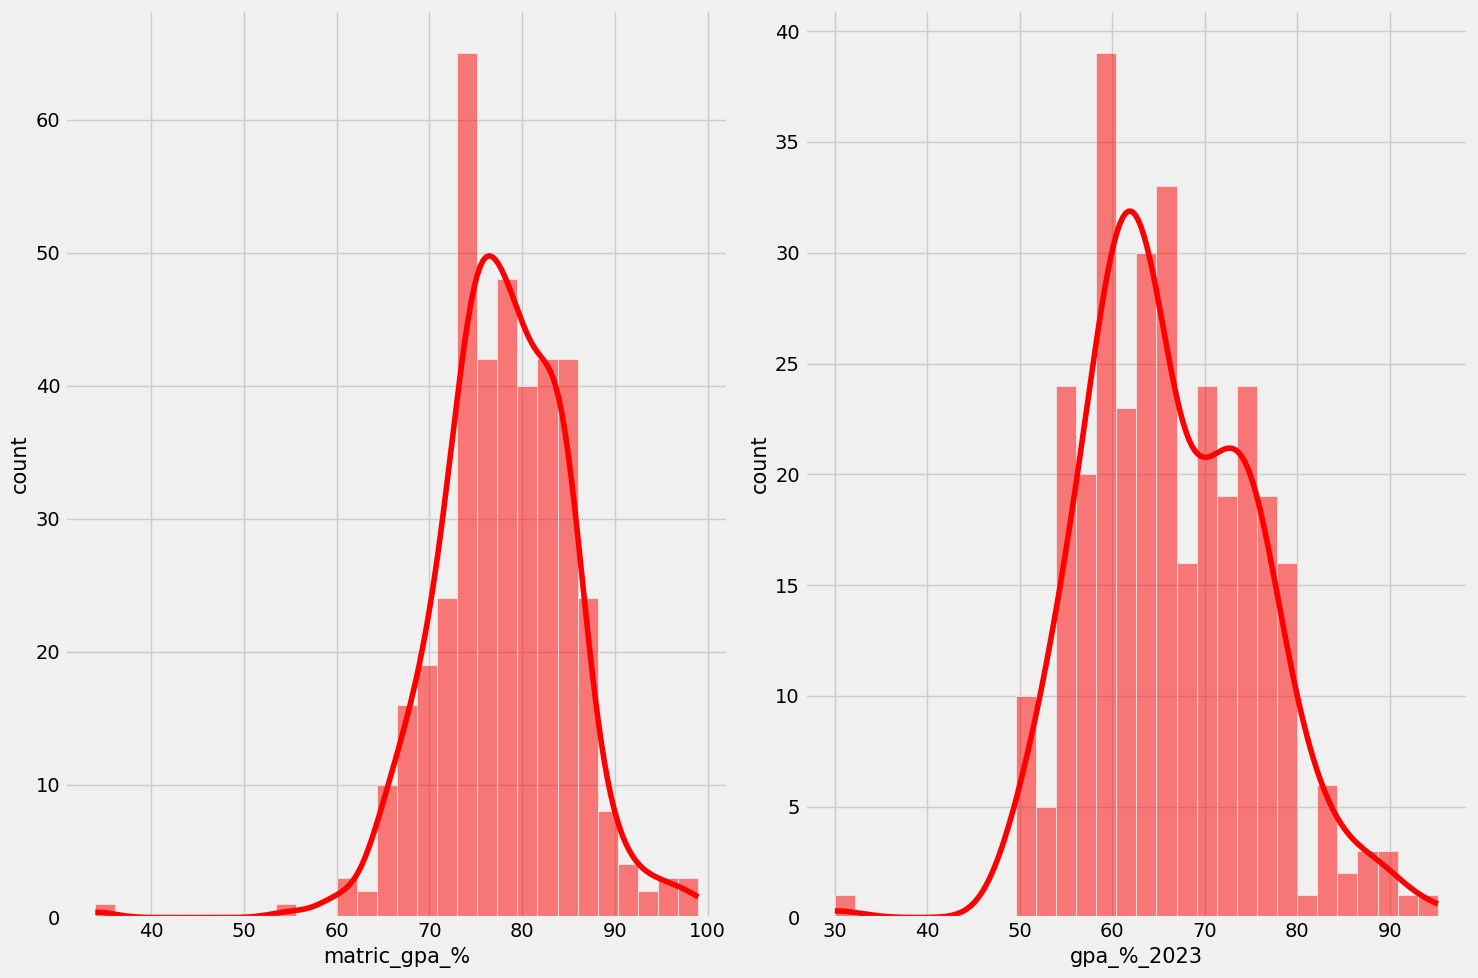

In [81]:
plt.style.use('fivethirtyeight')
fig=plt.figure()

cols = ['matric_gpa_%', 'gpa_%_2023']

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(15,10)
    
    sns.histplot(data=data[col], bins=30, color='red', kde=True)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.tight_layout()


**We can see outliers here by this plot**

<Axes: >

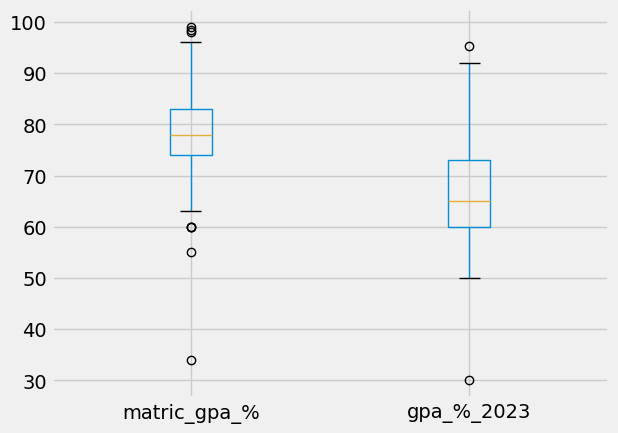

In [82]:
data.boxplot(column=['matric_gpa_%', 'gpa_%_2023'])

In [83]:
data.describe()

,matric_gpa_%,gpa_%_2023
count,399.000000,320.000000
mean,77.989724,66.268469
std,7.048618,9.147906
min,34.000000,30.000000
25%,74.000000,60.000000
50%,78.000000,65.000000
75%,83.000000,73.000000
max,99.000000,95.220000


#### Below plots explain that,
1. Most students read extra above 8 hours per week.
2. Most students monthly allowances is between 4001-5000, followed by range of 5001-6000.
3. Lower numbers of study people are in romantic relationship.
4. Classes missed due to hangover for both male and female is low.
5. Male population is litter higher than the female population.
6. Most parents of students approve of drinking alcohol in both male and female population.

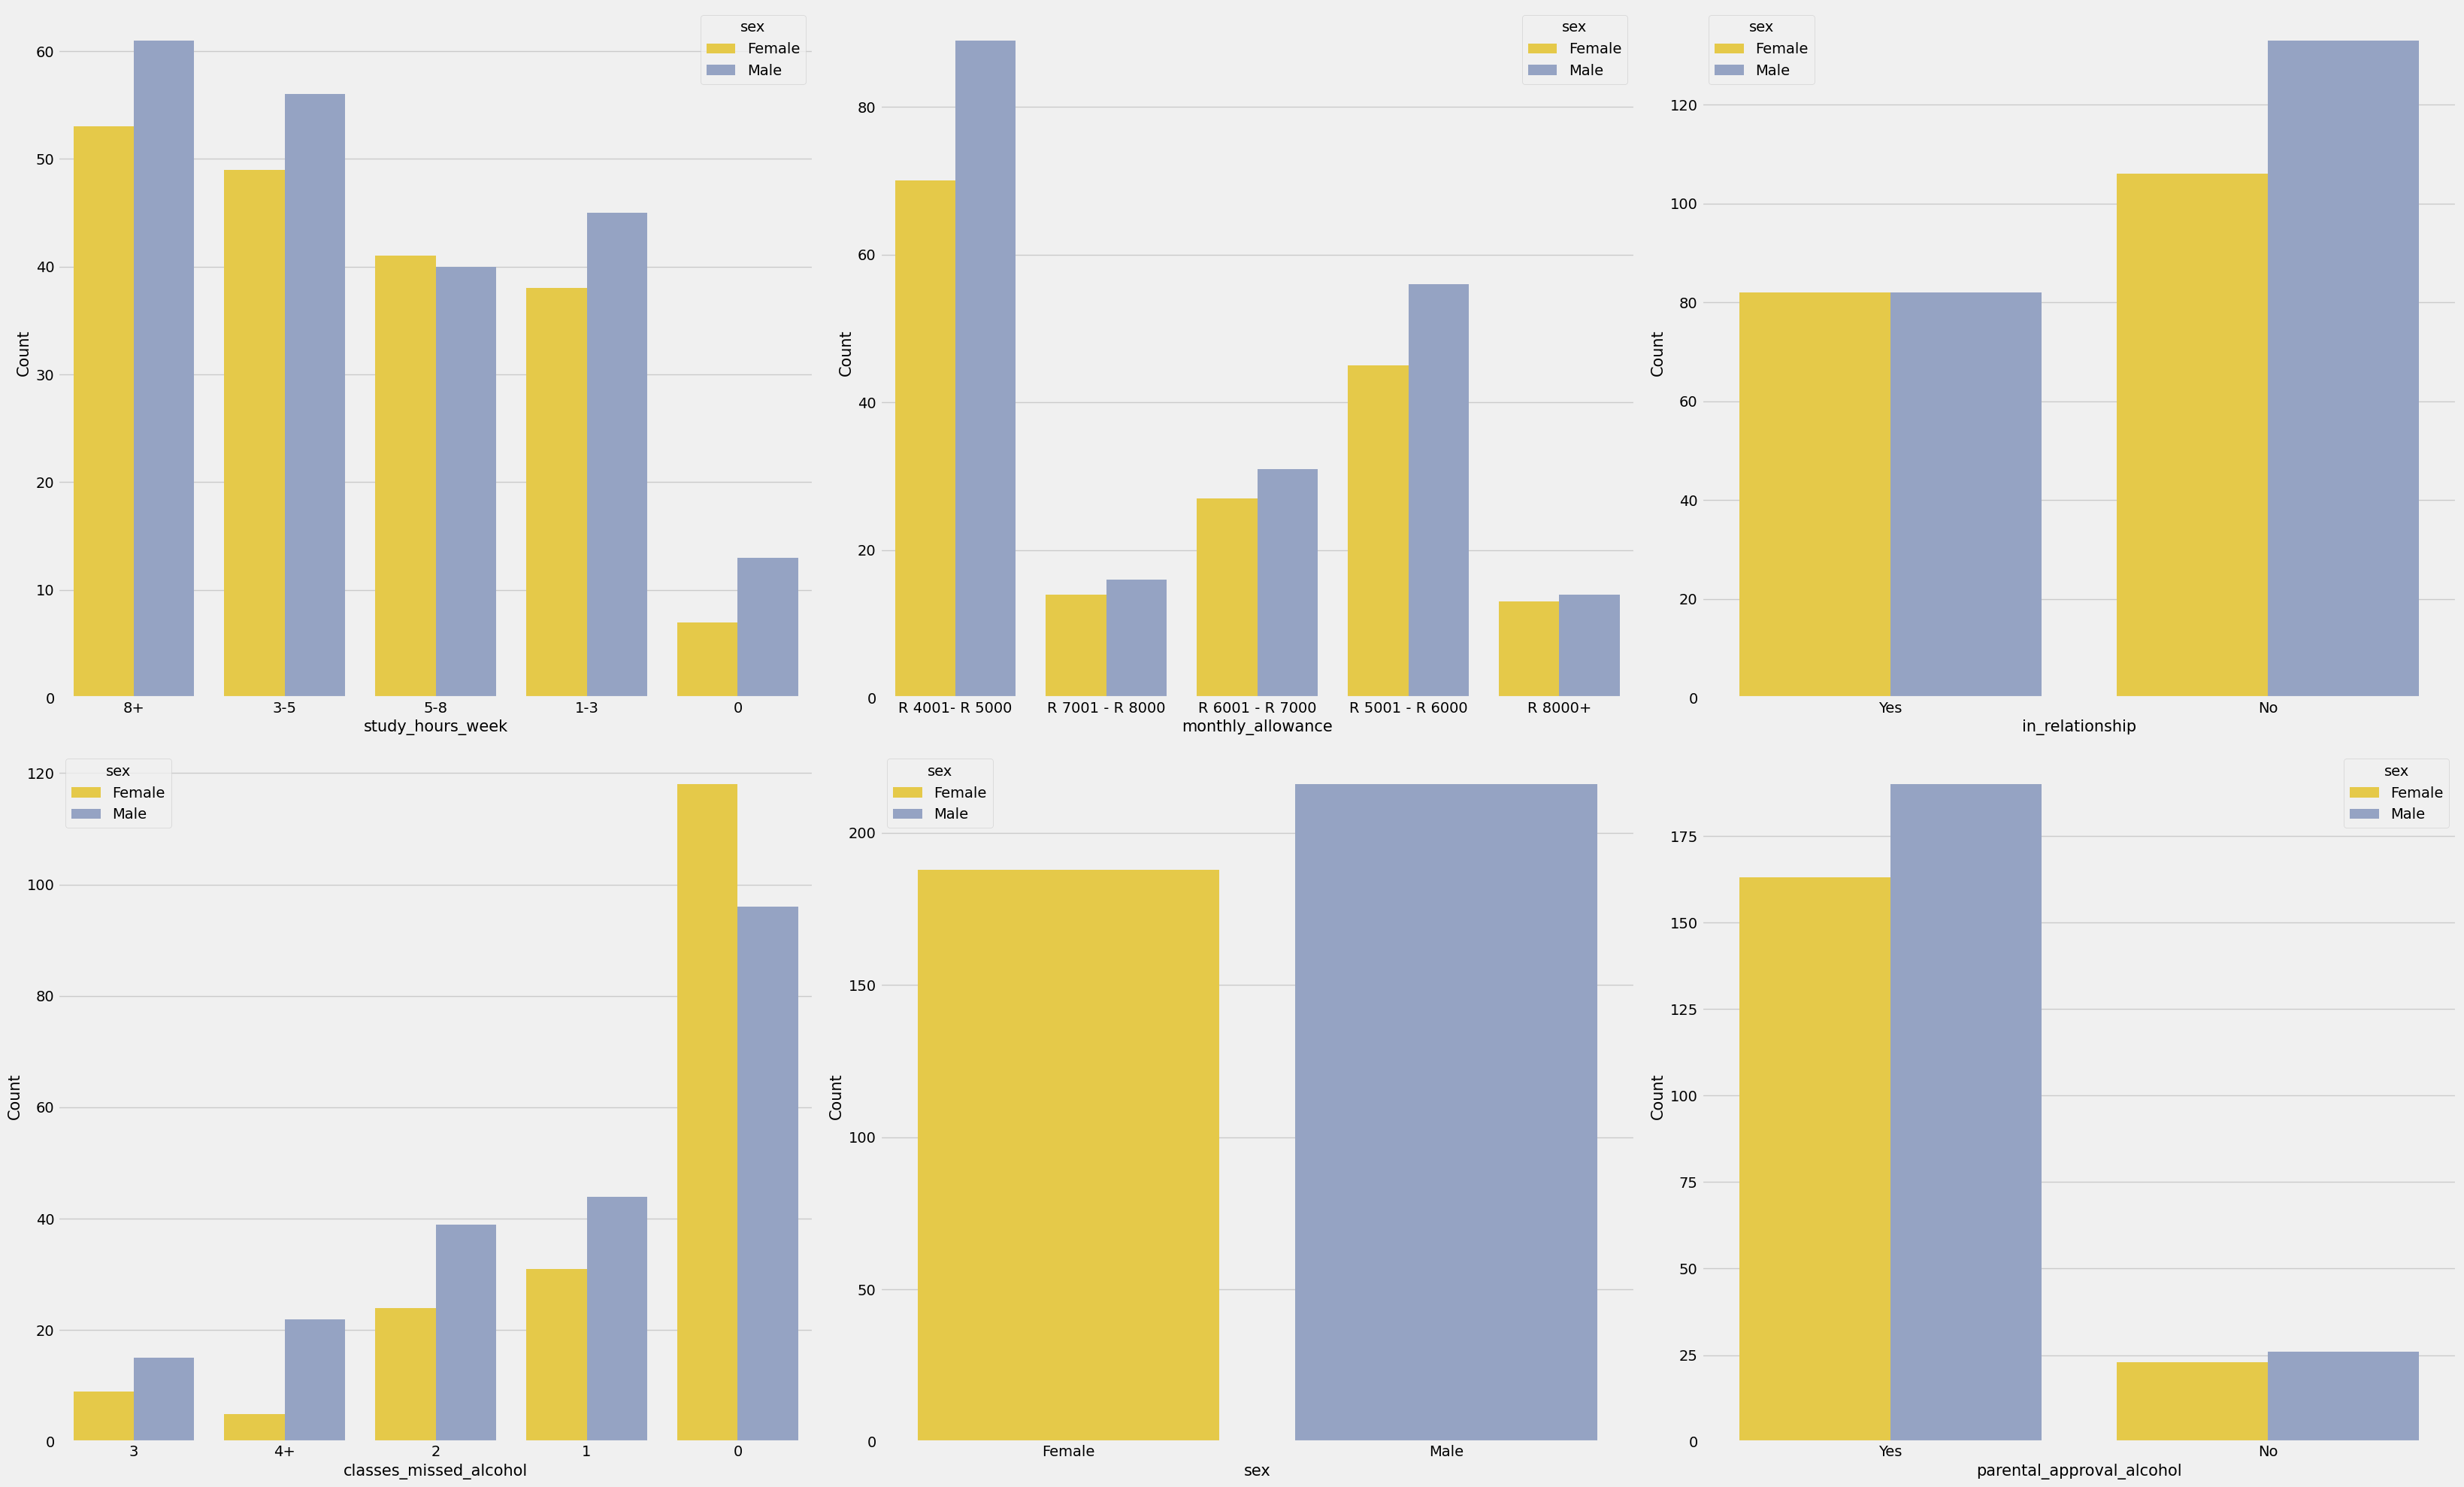

In [84]:
plt.style.use('fivethirtyeight')
fig=plt.figure()

cols=['study_hours_week','monthly_allowance','in_relationship','classes_missed_alcohol', 'sex', 'parental_approval_alcohol']


for i,col in enumerate(cols):
    fig.add_subplot(2,3,i+1)
    fig.set_size_inches(33, 20)
    sns.countplot(x=col,data=data,hue='sex',
                  palette='Set2_r')
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.tight_layout()

<br>

Text(0.5, 1.0, 'Relation of Students with Parents')

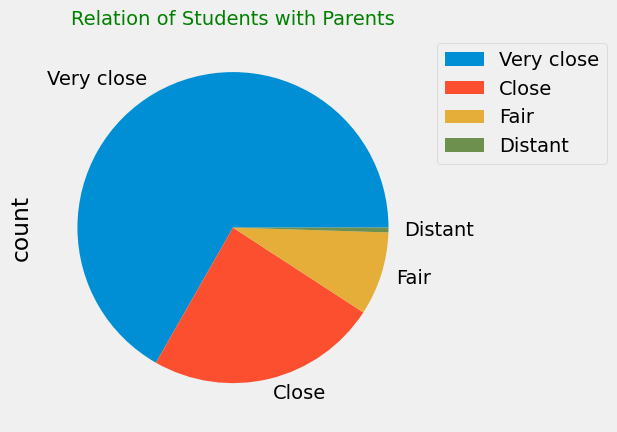

In [85]:
data.relationship_with_parents.value_counts().plot(kind='pie', color='red', legend=True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Relation of Students with Parents', fontsize=14, color='green')

The above piechart provide information that most population have a close relationship with their parents.

In [86]:
data.columns

Index(['timestamp', 'sex', 'matric_gpa_%', 'year_in_2023', 'faculty',
       'gpa_%_2023', 'accommodation_status', 'monthly_allowance',
       'scholarship_bursary_2023', 'study_hours_week', 'socialising_week',
       'drinks_night', 'classes_missed_alcohol', 'modules_failed',
       'in_relationship', 'parental_approval_alcohol',
       'relationship_with_parents'],
      dtype='object')

In [87]:
data.value_counts('accommodation_status', normalize=True)

accommodation_status
Private accommodation/ stay with family/friends    0.874674
Non-private accommodation ie. Res                  0.125326
Name: proportion, dtype: float64

In [88]:
data.accommodation_status.dtype

dtype('O')

**Checking correlation between two numerical columns**

In [89]:
corr = data[['matric_gpa_%', 'gpa_%_2023']].corr()

<Axes: >

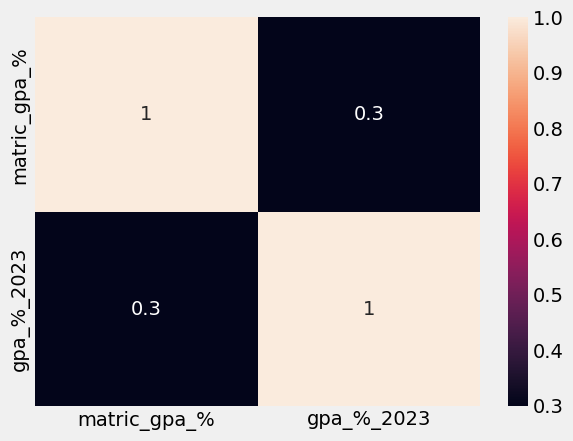

In [90]:
sns.heatmap(data=corr, annot=True)

**Checking duplicates in the datasets**

In [91]:
data.duplicated().sum()

0

In [92]:
data.in_relationship.value_counts()

in_relationship
No     239
Yes    164
Name: count, dtype: int64

**Checking null values in each columns of dataframe**

In [93]:
data.isna().sum()

timestamp                     0
sex                           2
matric_gpa_%                  7
year_in_2023                 73
faculty                       7
gpa_%_2023                   86
accommodation_status         23
monthly_allowance            31
scholarship_bursary_2023      8
study_hours_week              3
socialising_week              2
drinks_night                  2
classes_missed_alcohol        3
modules_failed                3
in_relationship               3
parental_approval_alcohol     4
relationship_with_parents     3
dtype: int64

**Index 224 and 232 has a value placed only in two columns.**

In [94]:
data.loc[data[data.isna().sum(axis=1)>=5].index]

,timestamp,sex,matric_gpa_%,year_in_2023,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship_bursary_2023,study_hours_week,socialising_week,drinks_night,classes_missed_alcohol,modules_failed,in_relationship,parental_approval_alcohol,relationship_with_parents
14,2024/03/07 5:14:35 pm EET,Male,78.0,NaN,Science,NaN,NaN,NaN,NaN,3-5,2,5-8,0,0,No,Yes,Very close
77,2024/03/07 5:43:24 pm EET,Female,87.0,NaN,Science,NaN,NaN,NaN,NaN,8+,Only weekends,1-3,0,0,No,Yes,Very close
115,2024/03/07 6:05:33 pm EET,Female,84.0,NaN,Economic & Management Sciences,NaN,NaN,NaN,NaN,0,3,5-8,0,0,No,Yes,Close
224,2024/03/07 9:24:43 pm EET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,2024/03/07 9:55:31 pm EET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343,2024/03/09 3:06:37 pm EET,Female,78.0,NaN,Economic & Management Sciences,NaN,NaN,NaN,NaN,8+,1,1-3,0,0,Yes,Yes,Close


### Data Manipulation

In [95]:
data.drop(labels=[224, 232], inplace=True)

**Droped two labels 224 and 232 which have excessive numbers of null values.** 

In [96]:
data.shape

(404, 17)

In [97]:
data.isna().sum()

timestamp                     0
sex                           0
matric_gpa_%                  5
year_in_2023                 71
faculty                       5
gpa_%_2023                   84
accommodation_status         21
monthly_allowance            29
scholarship_bursary_2023      6
study_hours_week              1
socialising_week              0
drinks_night                  0
classes_missed_alcohol        1
modules_failed                1
in_relationship               1
parental_approval_alcohol     2
relationship_with_parents     1
dtype: int64

In [98]:
data['faculty'].value_counts()

faculty
Economic & Management Sciences    211
Science                            56
Arts & Social Sciences             47
Engineering                        37
AgriSciences                       22
Medicine and Health Services       10
Law                                10
Education                           6
Name: count, dtype: int64

**Putting most repeated value for null value in `faculty` column**

In [99]:
data['faculty'].fillna(value= 'Economic & Management Sciences', inplace=True)
data.faculty.isna().sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_1384\3821774470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['faculty'].fillna(value= 'Economic & Management Sciences', inplace=True)


0